In [9]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.distributions.empirical_distribution import ECDF

# add precision
%precision 3

#%% Visualization Libraries
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns
sns.set(color_codes=True)

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

%matplotlib inline 

In [2]:
# Pregnancy Data
data = pd.read_pickle('nsfg_data.pkl')

The outcome codes 1, 3, 4 indicate live birth, stillbirth, and miscarriage.

We are excluding induced abortions, ectopic pregnancies,
and pregnancies in progress when interviewed.

In [3]:
# completed pregnancies
complete = data.query('outcome in [1,3,4]').prglngth

prglgth_counts = complete.value_counts().sort_index()

prglgth_counts.rank(pct=True)


0     0.08
1     0.10
2     0.44
3     0.55
4     0.78
5     0.58
6     0.80
7     0.55
8     0.76
9     0.84
10    0.52
11    0.66
12    0.64
13    0.82
14    0.26
15    0.38
16    0.40
17    0.68
18    0.21
19    0.32
20    0.24
21    0.28
22    0.62
23    0.17
24    0.35
25    0.17
26    0.60
27    0.14
28    0.42
29    0.30
30    0.74
31    0.35
32    0.70
33    0.48
34    0.50
35    0.86
36    0.90
37    0.92
38    0.96
39    1.00
40    0.98
41    0.94
42    0.88
43    0.72
44    0.46
45    0.21
46    0.03
47    0.03
48    0.12
50    0.06
Name: prglngth, dtype: float64

###  13.1 Survival curves

> ** Plotting cdf & sf using statsmodels empirical distribution.**



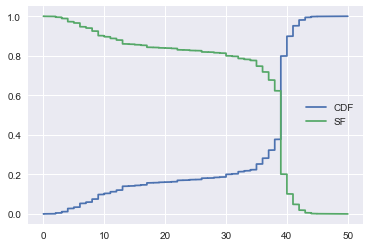

In [4]:
ecdf = ECDF(complete)
plt.plot(ecdf.x, ecdf.y,label='CDF' )
plt.plot(ecdf.x, 1 - ecdf.y, label='SF')
plt.legend()


### Fraction of pregnancies that proceed past the first trimester(13th week):

In [6]:
# using statsmodels ECDF
sf_pvals = 1 - ecdf.y
sf_vals = pd.DataFrame({'weeks':ecdf.x, 'sf_pvals':sf_pvals}, index=ecdf.x)

sf_vals.loc[13].min()

sf_pvals     0.86022
weeks       13.00000
dtype: float64

0.860

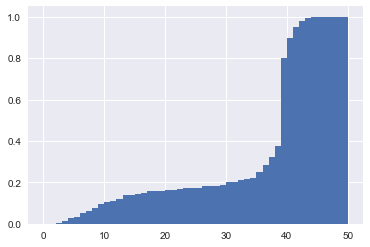

In [12]:
# using pandas
p_vals,bins, _ =  plt.hist(complete, bins=50,normed=True,cumulative=True )
sf_pvals = 1 - p_vals
sf_pvals[13]


### 13.2 Hazard function

In [13]:
# create the hazard function series
haz_f = np.abs(np.diff(sf_pvals)) / sf_pvals[:-1]

In [14]:
#Of all pregnancies that proceed until week 39, about 50% end in week 39
haz_f[39]

0.497

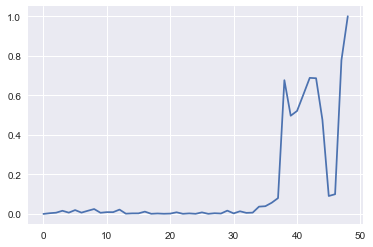

In [16]:
#plot 
plt.plot(haz_f, label='Hazard Function')